<a href="https://colab.research.google.com/github/Rupugal001/supervised-learning/blob/main/MultiLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
%matplotlib inline

In [151]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [152]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [154]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [155]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [156]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [166]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [158]:
le_CarName=LabelEncoder()
le_fueltype=LabelEncoder()
le_aspiration=LabelEncoder()
le_drivewheel=LabelEncoder()
le_enginetype=LabelEncoder()
le_Cylindernumber=LabelEncoder()
le_fuelsystem=LabelEncoder()

In [159]:
df['CarName_dtx']=le_CarName.fit_transform(df['CarName'])
df['fueltype_dtx']=le_fueltype.fit_transform(df['fueltype'])
df['aspiration_dtx']=le_aspiration.fit_transform(df['aspiration'])
df['drivewheel_dtx']=le_drivewheel.fit_transform(df['drivewheel'])
df['enginetype_dtx']=le_enginetype.fit_transform(df['enginetype'])
df['fuelsystem_dtx']=le_fuelsystem.fit_transform(df['fuelsystem'])

In [160]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarName_dtx', 'fueltype_dtx', 'aspiration_dtx',
       'drivewheel_dtx', 'enginetype_dtx', 'fuelsystem_dtx'],
      dtype='object')

In [161]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CarName_dtx           int64
fueltype_dtx          int64
aspiration_dtx        int64
drivewheel_dtx        int64
enginetype_dtx        int64
fuelsystem_dtx        int64
dtype: object

In [200]:
df1=df.drop(['car_ID','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','CarName_dtx','fueltype_dtx','aspiration_dtx','drivewheel_dtx','enginetype_dtx','fuelsystem_dtx','carlength', 'carwidth', 'carheight', 'curbweight','cylindernumber', 'enginesize'],axis='columns')

In [201]:

df1.columns

Index(['symboling', 'wheelbase', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [202]:
df1.head()

,symboling,wheelbase,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,3.19,3.40,8.0,115,5500,18,22,17450.0


<BarContainer object of 205 artists>

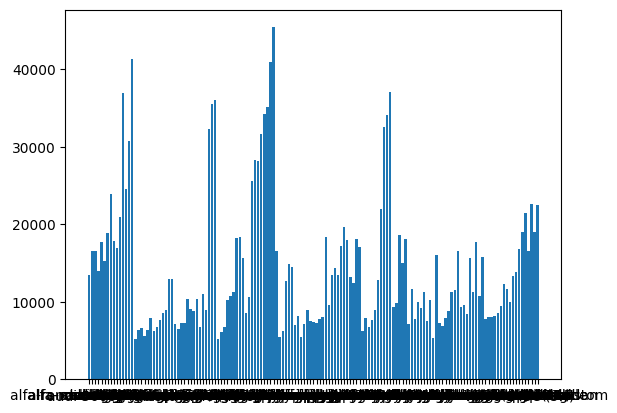

In [198]:
fig, ax = mlt.subplots()
ax.bar(df.CarName,df.price)

In [203]:
x_train,x_test,y_train,y_test=train_test_split(df1[[ 'symboling', 'wheelbase', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']],df1.price,test_size=0.3)

In [186]:
from sklearn import linear_model
rg=linear_model.LinearRegression()


In [204]:
rg.fit(x_train,y_train)

LinearRegression()

In [205]:
rg.predict(x_test)

array([ 5708.48540607, 11489.76241081,  9839.88114612,   810.3788496 ,
       17388.49148555, 23476.50438469,  1115.38384022, 25836.68786383,
        9389.58817043,  9352.36802351,  5037.70225347,  9510.07138986,
        9722.25071763,  5435.01852331, 12179.17360345,  6692.19572001,
       26409.841125  , 26191.99571824,  8839.28823726,  5435.01852331,
       15810.61577684,  6365.56790094,  9695.65379622, 11753.02940064,
        6870.23149227, 20825.97006096,  6855.87724121, 12974.89749713,
        5435.01852331,  6075.35100673,  5435.01852331,  5435.01852331,
        5037.70225347, 22293.08418622, 17647.59437839, 17713.50768217,
       10087.29798704, 14789.45486644, 15535.94211966, 19633.79633155,
       14921.27759507,  5694.78474835, 17289.09480627,  5708.48540607,
       42825.38557552, 10342.47636756,  4976.03823564,  5273.37207833,
       26446.45677692, 26026.5719316 , 17549.00409832,  5940.85625464,
        4888.30216067,  6194.79411644,  6075.35100673,  4988.19491555,
      